# Introduction to DEA Waterbodies <img align="right" src="../Supplementary_data/dea_logo.jpg" title="Digital Earth Australia logo">
<p align="left">                                                            
   <img alt="Waterbodies in Australia outlined to highlight the polygon extents" src="../Supplementary_data/DEA_Waterbodies/DEA_Waterbodies_v3-0header.png" width="30%">
</p>

* **[Sign up to the DEA Sandbox](https://app.sandbox.dea.ga.gov.au/)** to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** [DEA Waterbodies](https://knowled.dea.ga.gov.au/data/product/dea-waterbodies-landsat)


<div class="alert alert-block alert-info">
<b>IMPORTANT: DEA Waterbody graphs show the wet surface area of waterbodies as estimated from satellites. They do not show depth, volume, purpose of the waterbody, nor the source of the water. Larger waterbodies are easier to detect and smaller or narrower waterbodies are harder to detect. Area estimates should be compared to additional data for verification.

The update from version 2 to version 3.0 of the DEA Waterbodies product and service was created through a collaboration between Geoscience Australia, the National Aerial Firefighting Centre, Natural Hazards Research Australia, and FrontierSI to make the product more useful in hazard applications. Geoscience Australia, the National Aerial Firefighting Centre, Natural Hazards Research Australia, and FrontierSI advise that the information published by this service comprises general statements based on scientific research. The reader is advised and needs to be aware that such information may be incomplete or unable to be used in any specific situation. No reliance or actions must therefore be made on that information without seeking prior expert professional, scientific and technical advice. To the extent permitted by law, FrontierSI, Geoscience Australia, the National Aerial Firefighting Centre and Natural Hazards Research Australia (including its employees and consultants) are excluded from all liability to any person for any consequences, including but not limited to all losses, damages, costs, expenses and any other compensation, arising directly or indirectly from using this publication (in part or in whole) and any information or material contained in it. </b></div>

## Background
It is important to have up-to-date information about the extent and location of surface water in Australia. 
It provides us with a common understanding of this valuable and increasingly scarce resource.

### What this product offers
[DEA Waterbodies](https://knowledge.dea.ga.gov.au/data/product/dea-waterbodies-landsat/?tab=overview) uses Geoscience Australia’s archive of over 30 years of Landsat satellite imagery to identify where almost 300,000 waterbodies are in the Australian landscape and tells us the wet surface area within those waterbodies.

DEA Waterbodies uses a [water classification](https://www.dea.ga.gov.au/products/dea-water-observations) for every available Landsat satellite image for a pre-generated map of the locations of waterbodies across Australia. It provides a timeseries of wet surface area for waterbodies that were present more than 10% of the time between 1987-2020 and are larger than 2700 m$^2$ (3 Landsat pixels). These waterbodies have been derived from [DEA Water Observations](https://www.dea.ga.gov.au/products/dea-water-observations), a classifier which detects open water in Landsat pixels. 

- DEA Waterbodies can be viewed on the mapping portal [DEA Maps](https://maps.dea.ga.gov.au/#share=s-3ECq9avqVD8TopthD0gWnBnA3G9).

The DEA Waterbodies graphs indicates changes in the wet surface area of waterbodies. This can be used to identify when waterbodies are increasing or decreasing in wet surface area.

### Applications
* Understand and manage water across Australia
* Gain insights into the severity and spatial distribution of drought

### Publications
* Krause, C.E., Newey, V., Alger, M.J. and Lymburner, L., (2021). Mapping and monitoring the multi-decadal dynamics of Australia’s open waterbodies using Landsat. Remote Sensing, 13(8), p.1437. https://doi.org/10.3390/rs13081437
* Mueller, N., Lewis, A., Roberts, D., Ring, S., Melrose, R., Sixsmith, J., Lymburner, L., McIntyre, A., Tan, P., Curnow, S., & Ip, A. (2016). Water observations from space: Mapping surface water from 25 years of Landsat imagery across Australia. *Remote Sensing of Environment*, 174, 341–352. https://doi.org/10.1016/j.rse.2015.11.003

> **Note:** For more technical information about DEA Waterbodies, visit the official [Geoscience Australia DEA Waterbodies product description](https://knowledge.dea.ga.gov.au/data/product/dea-waterbodies-landsat).

## Description
This notebook will demonstrate how to load data from DEA Waterbodies using the scripts in this repository.
Topics covered include:

1. Getting a list of available polygons in an area
2. Accessing a polygon
3. Plotting the surface area of the polygon over time

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, "../Tools/")
from dea_tools.plotting import display_map
from dea_tools.waterbodies import (
    get_geohashes,
    get_waterbodies,
    get_waterbody,
    get_time_series,
)

## Analysis parameters

Choose an area to analyse:

In [2]:
xlim = (149.05, 149.19)
ylim = (-35.21, -35.33)

# Preview area on a map
display_map(xlim, ylim)

## Getting data

Every waterbody in DEA Waterbodies has a unique identifier called a [_geohash_](https://en.wikipedia.org/wiki/Geohash). The geohash of a waterbody is derived from their position, and this process can be reversed to obtain the location from the geohash. You can also get the geohash for a waterbody from [DEA Maps](http://maps.dea.ga.gov.au/) by clicking on a waterbody. It's the "waterbody identifier" in this screenshot:

![image.png](../Supplementary_data/DEA_Waterbodies/waterbodiesv3_nb_ex.JPG)

The `dea_waterbodies` module allows you to query waterbodies by geohash or by location.

### List geohashes and polygons in an area
We can get a list of geohashes for all waterbodies inside a bounding box of coordinates using `get_geohashes`.

In [3]:
# Create a bounding box from study area coordinates
bbox = (xlim[0], ylim[1], xlim[1], ylim[0])

# Use bounding box to get a list of matching geohashes
gh = get_geohashes(bbox, crs="EPSG:4326")

We can inspect the first five results to view their geohashes:

In [4]:
gh[0:5]

['r3dp9z9g3_v3',
 'r3dp9xjqm_v3',
 'r3dpdr4fy_v3',
 'r3dp8t6u9_v3',
 'r3dp9ts4q_v3']

You might notice that these all have a similar prefix (r39zp). If two geohashes have a similar prefix, then they are close together. (The inverse is not always true.)

We can also get all polygons for the same area by passing the same bounding box to `get_waterbodies`.

In [5]:
polys = get_waterbodies(bbox, crs="EPSG:4326")

<Axes: >

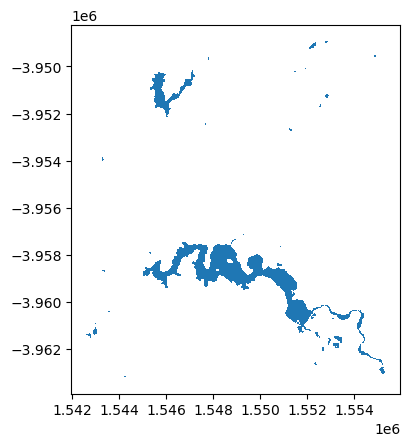

In [6]:
polys.plot()

### Getting data for a specific waterbody

We can use a geohash to get the polygon for an individual waterbody.
For example, we can load data for Canberra's Lake Burley Griffin using its geohash `r3dp1nxh8_v3`.

<Axes: >

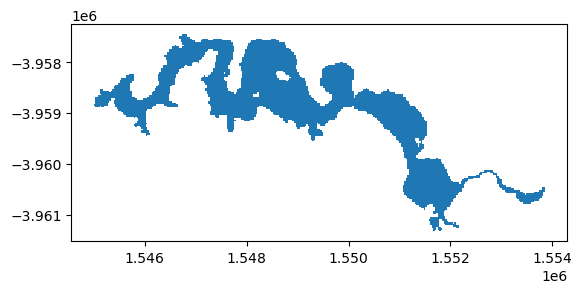

In [7]:
get_waterbody("r3dp1nxh8_v3").plot()

The polygon also contains metadata including the waterbody's area, perimeter and ID:

In [8]:
get_waterbody("r3dp1nxh8_v3")

,id,uid,timeseries,dt_wetobs,dt_satpass,dt_updated,dt_created,meta_url,wet_sa_m2,perimetr_m,area_m2,geometry
0,DigitalEarthAustraliaWaterbodies_v3.290859,r3dp1nxh8_v3,https://data.dea.ga.gov.au/derivative/dea_wate...,2023-09-21 23:50:45+00:00,2023-11-08 23:50:49+00:00,2023-11-20 10:20:00.901000+00:00,2023-11-20,https://dx.doi.org/10.26186/148920,5918585.76,49740,6455700,"MULTIPOLYGON (((1546740.000 -3957450.000, 1546..."


For any given geohash or a polygon, we can also use the `get_time_series` function to get surface area over time.
For example, surface area data for the first polygon in `polys` (a waterbody in the suburb of Coombs, Canberra) shows that it was constructed in 2013:

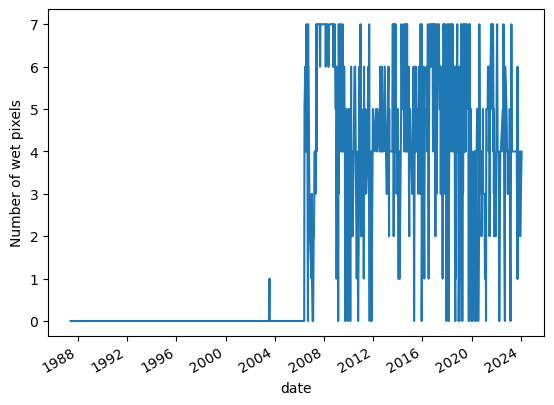

In [9]:
get_time_series(waterbody=polys.iloc[0])["px_wet"].plot()
plt.ylabel("Number of wet pixels");

Canberra's Lake Burley Griffin is more consistent over time:

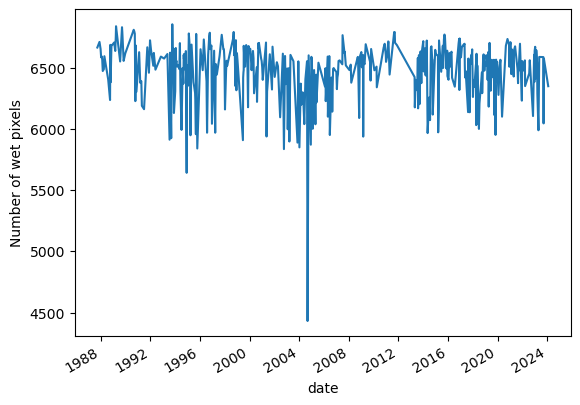

In [10]:
get_time_series(geohash="r3dp1nxh8_v3")["px_wet"].plot()
plt.ylabel("Number of wet pixels");

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Citation** &mdash; If you use this repository in your work, please reference
it with the following citation.

> Krause, C., Dunn, B., Bishop-Taylor, R., Adams, C., Burton, C., Alger,
> M., Chua, S., Phillips, C., Newey, V., Kouzoubov, K., Leith, A.,
> Ayers, D., Hicks, A., DEA Notebooks contributors 2021. Digital Earth
> Australia notebooks and tools repository. Geoscience Australia,
> Canberra. <https://doi.org/10.26186/145234>

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** March 2024

## Tags
<!-- Browse all available tags on the DEA User Guide's [Tags Index](https://knowledge.dea.ga.gov.au/genindex/) -->